In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import fits

In [4]:
import os
homedir=os.getenv("HOME")

In [6]:
file = fits.getdata(homedir+'/Desktop/maskies_ngc3364/NGC3364-custom-image-W3.fits')

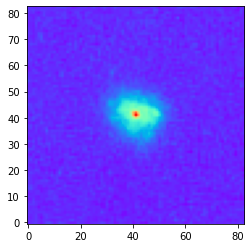

In [40]:
data=plt.imshow(file,origin='lower',cmap='rainbow')

In [41]:
data.set_cmap('viridis')

In [91]:
d={
    "mult":'*',
    "add":'+',
    "subtr":'-'}

In [97]:
eval('5'+d['mult']+'5')

25

In [94]:
eval("5*5")

25

In [605]:
#https://cdsarc.cds.unistra.fr/viz-bin/cat/J/ApJS/245/25#/article

In [420]:
#sorts in ascending order according to one column's entries
re.sort('prefix')

In [596]:
#no psf case; marked galaxies with GALFIT error flags; allWISE (WXSC) vs. unWISE (me)
#can't easily compare radii; WXSC reports SMA. unsure whether SMA is full diameter and if it
#represents the SMA of the effective radius?

#use w3 magnitude instead. 
eff = re['R3']
my_eff = psf_params_v1['re']*2.75/60

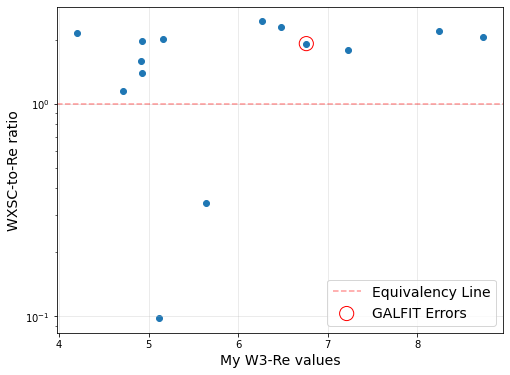

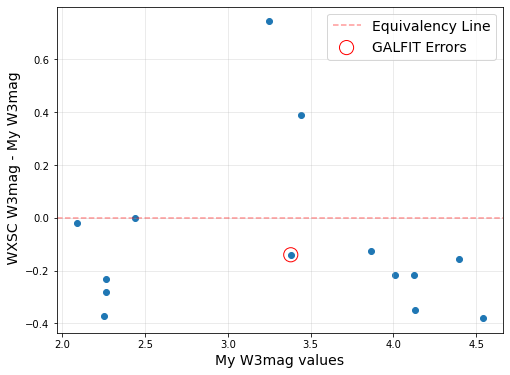

In [603]:
plt.figure(figsize=(8,6))

plt.scatter(eff,eff/my_eff/2)
plt.grid(alpha=0.3)
plt.xlabel('My W3-Re values',fontsize=14)
plt.ylabel('WXSC-to-Re ratio',fontsize=14)
plt.axhline(1,color='r',linestyle='dashed',alpha=0.4, label='Equivalency Line')

err = re_galfit['err_flag']==1
plt.scatter(eff[err],eff[err]/my_eff[err]/2,color='red',s=200,facecolor='None',label='GALFIT Errors')

#plt.ylim(0,40)
plt.yscale('log')
plt.legend(fontsize=14)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(re_galfit['mag'],re['W3mag']-re_galfit['mag'])
plt.grid(alpha=0.3)
plt.xlabel('My W3mag values',fontsize=14)
plt.ylabel(' WXSC W3mag - My W3mag',fontsize=14)
#plt.ylim(0,4)

plt.axhline(0,color='r',linestyle='dashed',alpha=0.4,label='Equivalency Line')

plt.scatter(re_galfit['mag'][err],re['W3mag'][err]-re_galfit['mag'][err],
            color='red',s=200,facecolor='None',label='GALFIT Errors')
plt.legend(fontsize=14)
plt.show()

In [606]:
re

Name,RAJ2000,DEJ2000,Morph,b_a,PA,R1,W1mag,R2,W2mag,R3,W3mag,R4,W4mag,Dist,Beam,W1-W2,W2-W3,LogLw1,LogMs,LognuL3,LognuL4,SFR12,SFR23,sSFR12,RW1,AW1mag,e_AW1mag,RW2,AW2mag,e_AW2mag,RW3,SimbadName,RA_1,DEC_1,objname,NEDname,VFID_V1,prefix,coadd_id
str10,float64,float64,str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str10,float64,float64,str7,str12,str8,str20,str8
NGC5907,228.97304,56.32876,SABc,0.19,154.3,6.76,6.47,6.76,6.35,6.76,3.24,6.76,1.57,17.06,496,0.11,3.15,11.16,10.72,9.5,9.33,4.92,3.39,-10.03,7.91,6.46,0.01,8.04,6.34,0.01,8.05,NGC5907,228.9731505,56.3291505,NGC5907,NGC 5907,VFID0937,VFID0936-NGC5907,2293p560
NGC2841,140.51106,50.97655,SBb,0.47,151.4,6.41,5.89,4.93,5.91,4.93,3.78,4.93,2.21,14.08,410,-0.01,2.16,11.22,11.09,9.04,8.91,1.93,1.4,-10.8,7.68,5.88,0.01,6.33,5.89,0.01,4.68,NGC2841,140.511066,50.9766176,NGC2841,NGC 2841,VFID1276,VFID1274-NGC2841,1406p514
NGC4217,183.96248,47.09152,ZZZ,0.17,49.3,5.59,7.23,4.2,7.09,4.2,3.74,4.2,2.07,18.57,540,0.16,3.34,10.93,10.35,9.38,9.2,3.85,2.59,-9.76,6.69,7.21,0.01,5.6,7.05,0.01,5.01,NGC4217,183.9621975,47.0918971,NGC4217,NGC 4217,VFID1556,VFID1554-NGC4217,1832p469
MESSIER63,198.95549,42.02931,Sbc,0.6,103.4,8.73,5.26,8.73,5.2,8.73,1.88,8.73,0.25,9.81,285,0.05,3.35,11.16,10.86,9.56,9.38,5.6,3.75,-10.11,10.36,5.25,0.01,9.94,5.19,0.01,10.17,MESSIER63,198.9553965,42.0292782,NGC5055,MESSIER 063,VFID1932,VFID1930-MESSIER063,1982p424
NGC2683,133.17226,33.42194,Sb,0.19,42.0,7.16,6.14,6.26,6.1,6.26,3.79,6.26,2.65,8.47,246,0.03,2.37,10.7,10.45,8.64,8.29,0.87,0.38,-10.51,8.4,6.13,0.01,7.46,6.08,0.01,7.47,NGC2683,133.172916,33.4225,NGC2683,NGC 2683,VFID2627,VFID2625-NGC2683,1331p333
NGC4725,192.61075,25.50079,SABa,0.63,40.0,6.44,6.09,5.12,6.15,5.12,3.99,5.12,2.62,12.74,371,-0.03,2.2,11.08,10.98,8.91,8.68,1.5,0.86,-10.8,7.67,6.07,0.01,6.46,6.12,0.01,5.22,NGC4725,192.610875,25.50075,NGC4725,NGC 4725,VFID3289,VFID3286-NGC4725,1933p257
NGC2903,143.04214,21.50136,Sbc,0.49,21.5,6.48,5.67,6.48,5.58,6.48,2.07,6.48,0.09,9.98,290,0.08,3.55,11.02,10.64,9.52,9.46,5.07,4.42,-9.94,7.57,5.66,0.01,7.75,5.57,0.01,7.7,NGC2903,143.042052,21.5015656,NGC2903,NGC 2903,VFID3581,VFID3578-NGC2903,1436p212
MESSIER98,183.45123,14.90056,SABb,0.28,155.7,5.64,6.71,5.64,6.67,5.64,3.83,5.64,2.21,15.98,465,0.03,2.91,11.01,10.77,9.2,9.03,2.7,1.82,-10.34,6.62,6.7,0.01,6.69,6.66,0.01,6.77,MESSIER98,183.451428,14.8999705,NGC4192,MESSIER 098,VFID4215,VFID4212-MESSIER098,1831p151
NGC3628,170.07085,13.58912,SBb,0.23,105.1,10.2,5.76,8.24,5.64,8.24,2.44,8.24,0.51,10.45,304,0.12,3.24,11.02,10.53,9.4,9.33,4.05,3.4,-9.93,12.02,5.75,0.01,10.21,5.62,0.01,9.79,NGC3628,170.0707545,13.5896273,NGC3628,NGC 3628,VFID4418,VFID4414-NGC3628,1706p136


In [ ]:
#psf_params_v1 --> website values
#re_galfit --> Rose's values
#re --> WXSC's values

In [564]:
type(3.3) == float

True

In [566]:
grid = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15],[16,17,18,19,20],[21,22,23,24,25]])

In [569]:
grid

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [570]:
grid[4][1]

22

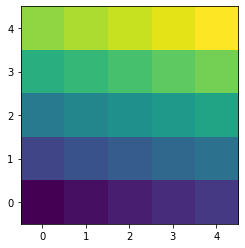

In [573]:
im=plt.imshow(grid,origin='lower')

In [615]:
path_to_dir = homedir+'/Desktop/v2-20220820/'
v2_env = Table.read(path_to_dir+'vf_v2_environment.fits')

In [ ]:
v2_env

In [824]:
sgacut

VFID,RA_1,DEC_1,vr,radius,radius_flag,objname,PGC,NSAIDV1,NSAIDV0,AGC,NEDname,HLflag,NSAV1flag,NSAV0flag,A100flag,VFID_V1,COflag,HAflag,HAobsflag,Z0MGSflag,Steerflag,unwiseflag,prefix,snr15,snr30,snr15_flag,snr30_flag,coadd_id,GroupID,GroupSize,sgacut_flag,SGA_r50_arcsec
,,,,arcsec,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bytes8,float64,float64,float64,float32,bool,bytes28,int32,int32,int32,int64,bytes30,bool,bool,bool,bool,bytes8,bool,bool,bool,bool,bool,bool,bytes36,float64,float64,bool,bool,bytes8,int32,int32,bool,float32
VFID0000,185.86877249999998,74.9522485,1418.8,23.829847,True,NGC4363,40233,0,0,0,NGC 4363,True,False,False,False,VFID0000,False,False,False,True,True,False,VFID0000-NGC4363,4.210659913453564,3.189597072176099,False,False,1853p742,1,4,False,12.075371
VFID0001,182.208,74.9042778,1331.5,49.6731,True,NGC4133,38578,0,0,0,NGC 4133,True,False,False,False,VFID0001,False,False,False,True,True,False,VFID0001-NGC4133,4.210659913453564,3.189597072176099,True,True,1800p742,--,--,True,18.736118
VFID0002,145.944663,74.8595778,3049.4,62.3909,True,NGC2977,27845,0,0,0,NGC 2977,True,False,False,False,VFID0002,False,False,False,True,True,False,VFID0002-NGC2977,4.210659913453564,3.189597072176099,True,True,1451p757,--,--,True,21.219566
VFID0003,185.5730835,74.8383889,1833.0,26.128908,True,PGC040048,40048,0,0,0,CGCG 352-030,True,False,False,False,VFID0003,False,False,False,True,True,False,VFID0003-CGCG352-030,4.210659913453564,3.189597072176099,False,False,1853p742,1,4,False,6.5389104
VFID0004,182.82775049999998,74.8082222,1683.0,40.937492,True,UGC07189,38805,0,0,0,UGC 07189,True,False,False,False,VFID0004,False,False,False,True,True,False,VFID0004-UGC07189,4.210659913453564,3.189597072176099,False,False,1853p742,1,4,False,23.926355
VFID0005,173.1341835,74.6275401,1920.1,48.654305,True,NGC3752,35608,0,0,0,NGC 3752,True,False,False,False,VFID0005,False,False,False,True,True,True,VFID0005-NGC3752,4.210659913453564,3.189597072176099,True,True,1747p742,--,--,True,38.052376
VFID0006,121.912404,74.5846308,2333.0,26.984928,True,UGC04202,22815,0,0,0,UGC 04202,True,False,False,False,VFID0006,False,False,False,True,True,False,VFID0006-UGC04202,4.210659913453564,3.189597072176099,False,False,1217p742,--,--,False,17.930315
VFID0007,118.2363,74.576533,2346.0,23.448833,True,PGC022064,22064,0,0,0,KUG 0746+747,True,False,False,False,VFID0007,False,False,False,True,True,False,VFID0007-KUG0746+747,4.210659913453564,3.189597072176099,False,False,1164p742,2,2,False,12.4476


In [831]:
roseparam=Table.read('output_params_W3_nopsf.fits')

In [874]:
kimparam=Table.read('kim_w3_params_nopsf.fits')
kimparam_psf=Table.read('kim_w3_params_psf.fits')

In [875]:
roseparam=roseparam[(roseparam['xc']>0)]

In [879]:
parflag=[]
for vfid in kimparam_psf['galname']:
    vfid=vfid[0:8]
    if vfid in roseparam['VFID']:
        parflag.append(True)
    else:
        parflag.append(False)

In [880]:
kimparam_psf=kimparam_psf[parflag]

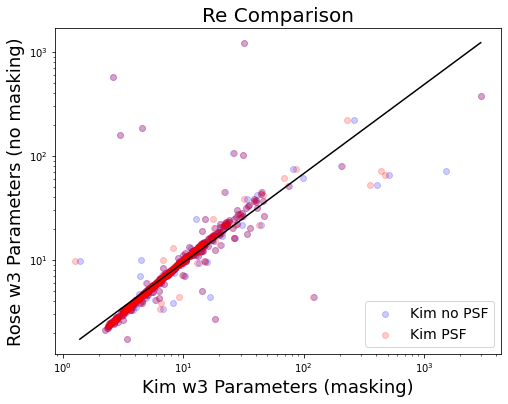

In [899]:
plt.figure(figsize=(8,6))
plt.scatter(kimparam['re'],roseparam['re'],alpha=0.2,color='blue',label='Kim no PSF')
plt.scatter(kimparam_psf['re'],roseparam['re'],alpha=0.2,color='red',label='Kim PSF')
plt.plot([np.min(kimparam['re']),np.max(kimparam['re'])], [np.min(roseparam['re']),np.max(roseparam['re'])],color='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Kim w3 Parameters (masking)',fontsize=18)
plt.ylabel('Rose w3 Parameters (no masking)',fontsize=18)
plt.title('Re Comparison',fontsize=20)
plt.legend(fontsize=14)
plt.show()

In [868]:
kimparam[kimparam['re']>1000]

galname_v2,xc,xc_err,yc,yc_err,mag,mag_err,re,re_err,nsersic,nsersic_err,BA,BA_err,PA,PA_er,sky,sky_err,err_flag,chi2nu,central_flag
bytes8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
VFID3286,250.6978,0.0109,250.7585,0.0125,0.7738,0.0905,2956.6758,348.6017,7.1796,0.144,0.5398,0.0027,39.7194,0.2535,-190.5711,3.1445,0.0,2.227654,1.0
VFID5901,250.3498,0.0174,250.7867,0.0219,2.3135,0.3934,1516.7144,720.3325,7.0367,0.518,0.8198,0.0104,7.7828,1.8899,-324.9799,16.52,0.0,1.215488,1.0


In [869]:
roseparam[roseparam['re']>1000]

VFID,xc,xc_err,yc,yc_err,mag,mag_err,re,re_err,nsersic,nsersic_err,BA,BA_err,PA,PA_er,sky,sky_err,err_flag,chi2nu,central_flag
bytes8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
VFID1984,129.575,0.0126,129.1246,0.0086,1.0414,0.2084,1232.9091,304.2242,5.9974,0.2677,0.8421,0.0072,20.736,1.5047,-550.6078,17.6834,0.0,4.103469,1.0


In [872]:
sgacut[(sgacut['VFID']=='VFID1984')]

VFID,RA_1,DEC_1,vr,radius,radius_flag,objname,PGC,NSAIDV1,NSAIDV0,AGC,NEDname,HLflag,NSAV1flag,NSAV0flag,A100flag,VFID_V1,COflag,HAflag,HAobsflag,Z0MGSflag,Steerflag,unwiseflag,prefix,snr15,snr30,snr15_flag,snr30_flag,coadd_id,GroupID,GroupSize,sgacut_flag,SGA_r50_arcsec
,,,,arcsec,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bytes8,float64,float64,float64,float32,bool,bytes28,int32,int32,int32,int64,bytes30,bool,bool,bool,bool,bytes8,bool,bool,bool,bool,bool,bool,bytes36,float64,float64,bool,bool,bytes8,int32,int32,bool,float32
VFID1984,154.57058999999998,41.4243426,592.2,221.88158,True,NGC3184,30087,269261,55122,0,NGC 3184,True,True,True,False,VFID1986,False,False,False,True,True,False,VFID1984-NGC3184,4.210659913453564,3.189597072176099,True,True,1542p408,427,3,True,94.59465


In [898]:
#20 columns, 702 rows
len(np.zeros((702,20)))  #prints number of rows

702

In [921]:
e=1.602e-19
e0 = 8.854e-12
k=1.38e-23
T=3e9
denom=6*np.pi*e0*k*T
num=e**2
frac = num/denom
sec=8.8e-16**2*np.pi

In [927]:
n=1e5/(273*1.38e-23)
sec=np.pi*(1.45e-10**2)
sec

6.60519855417254e-20